# Instructions

1. Engineer your features (e.g. fill empty values) and wrangle the data into a form that can be used with machine learning models.<br>
    - Handle continuous and categorical variables appropriately
    - Choose independent variables that are correlated with the dependent variable but NOT correlated with each other. Choosing too many variables can cause overfitting and lead to a worse fit than before
    - A good way to check for colinearity between independent variables is simple linear regression between them (e.g. sns.pairplot) and ruling out any colinear ones.<br> <br>
2. Use 2-3 models on the data (e.g. random forest, gradient booster, log regression)<br>
    - Use gridsearch to optimize hyperparamters
    - Choose the best fitting model<br> <br>
3. Using the models, make some predictions and visualize those predictions<br>
    - Choose specific predictor variable(s) and compare the actual with predicted values for each model
    - Explain why you choose certain predictor variables and ignored others<br> <br>
4. Brief Write-up/Presentation<br>
    - What you did, what you considered, features you used/didn't use
    - Summarize your results in a 3-10 minutes (5 slide) pre-recorded presentation
    - 1-2 pg report<br> <br>

# Importing Essential Libraries

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures,OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import brier_score_loss, classification_report, confusion_matrix, roc_auc_score

# Cleaning and Interpreting Data

1. Check for correlation between variables.<br><br>
2. Use data visualization to better understand variables and their relationships between each other

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.drop(['sex','fbs','cp','restecg','exang','oldpeak','slope','ca','thal','target'],axis=1).describe()

,age,trestbps,chol,thalach
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


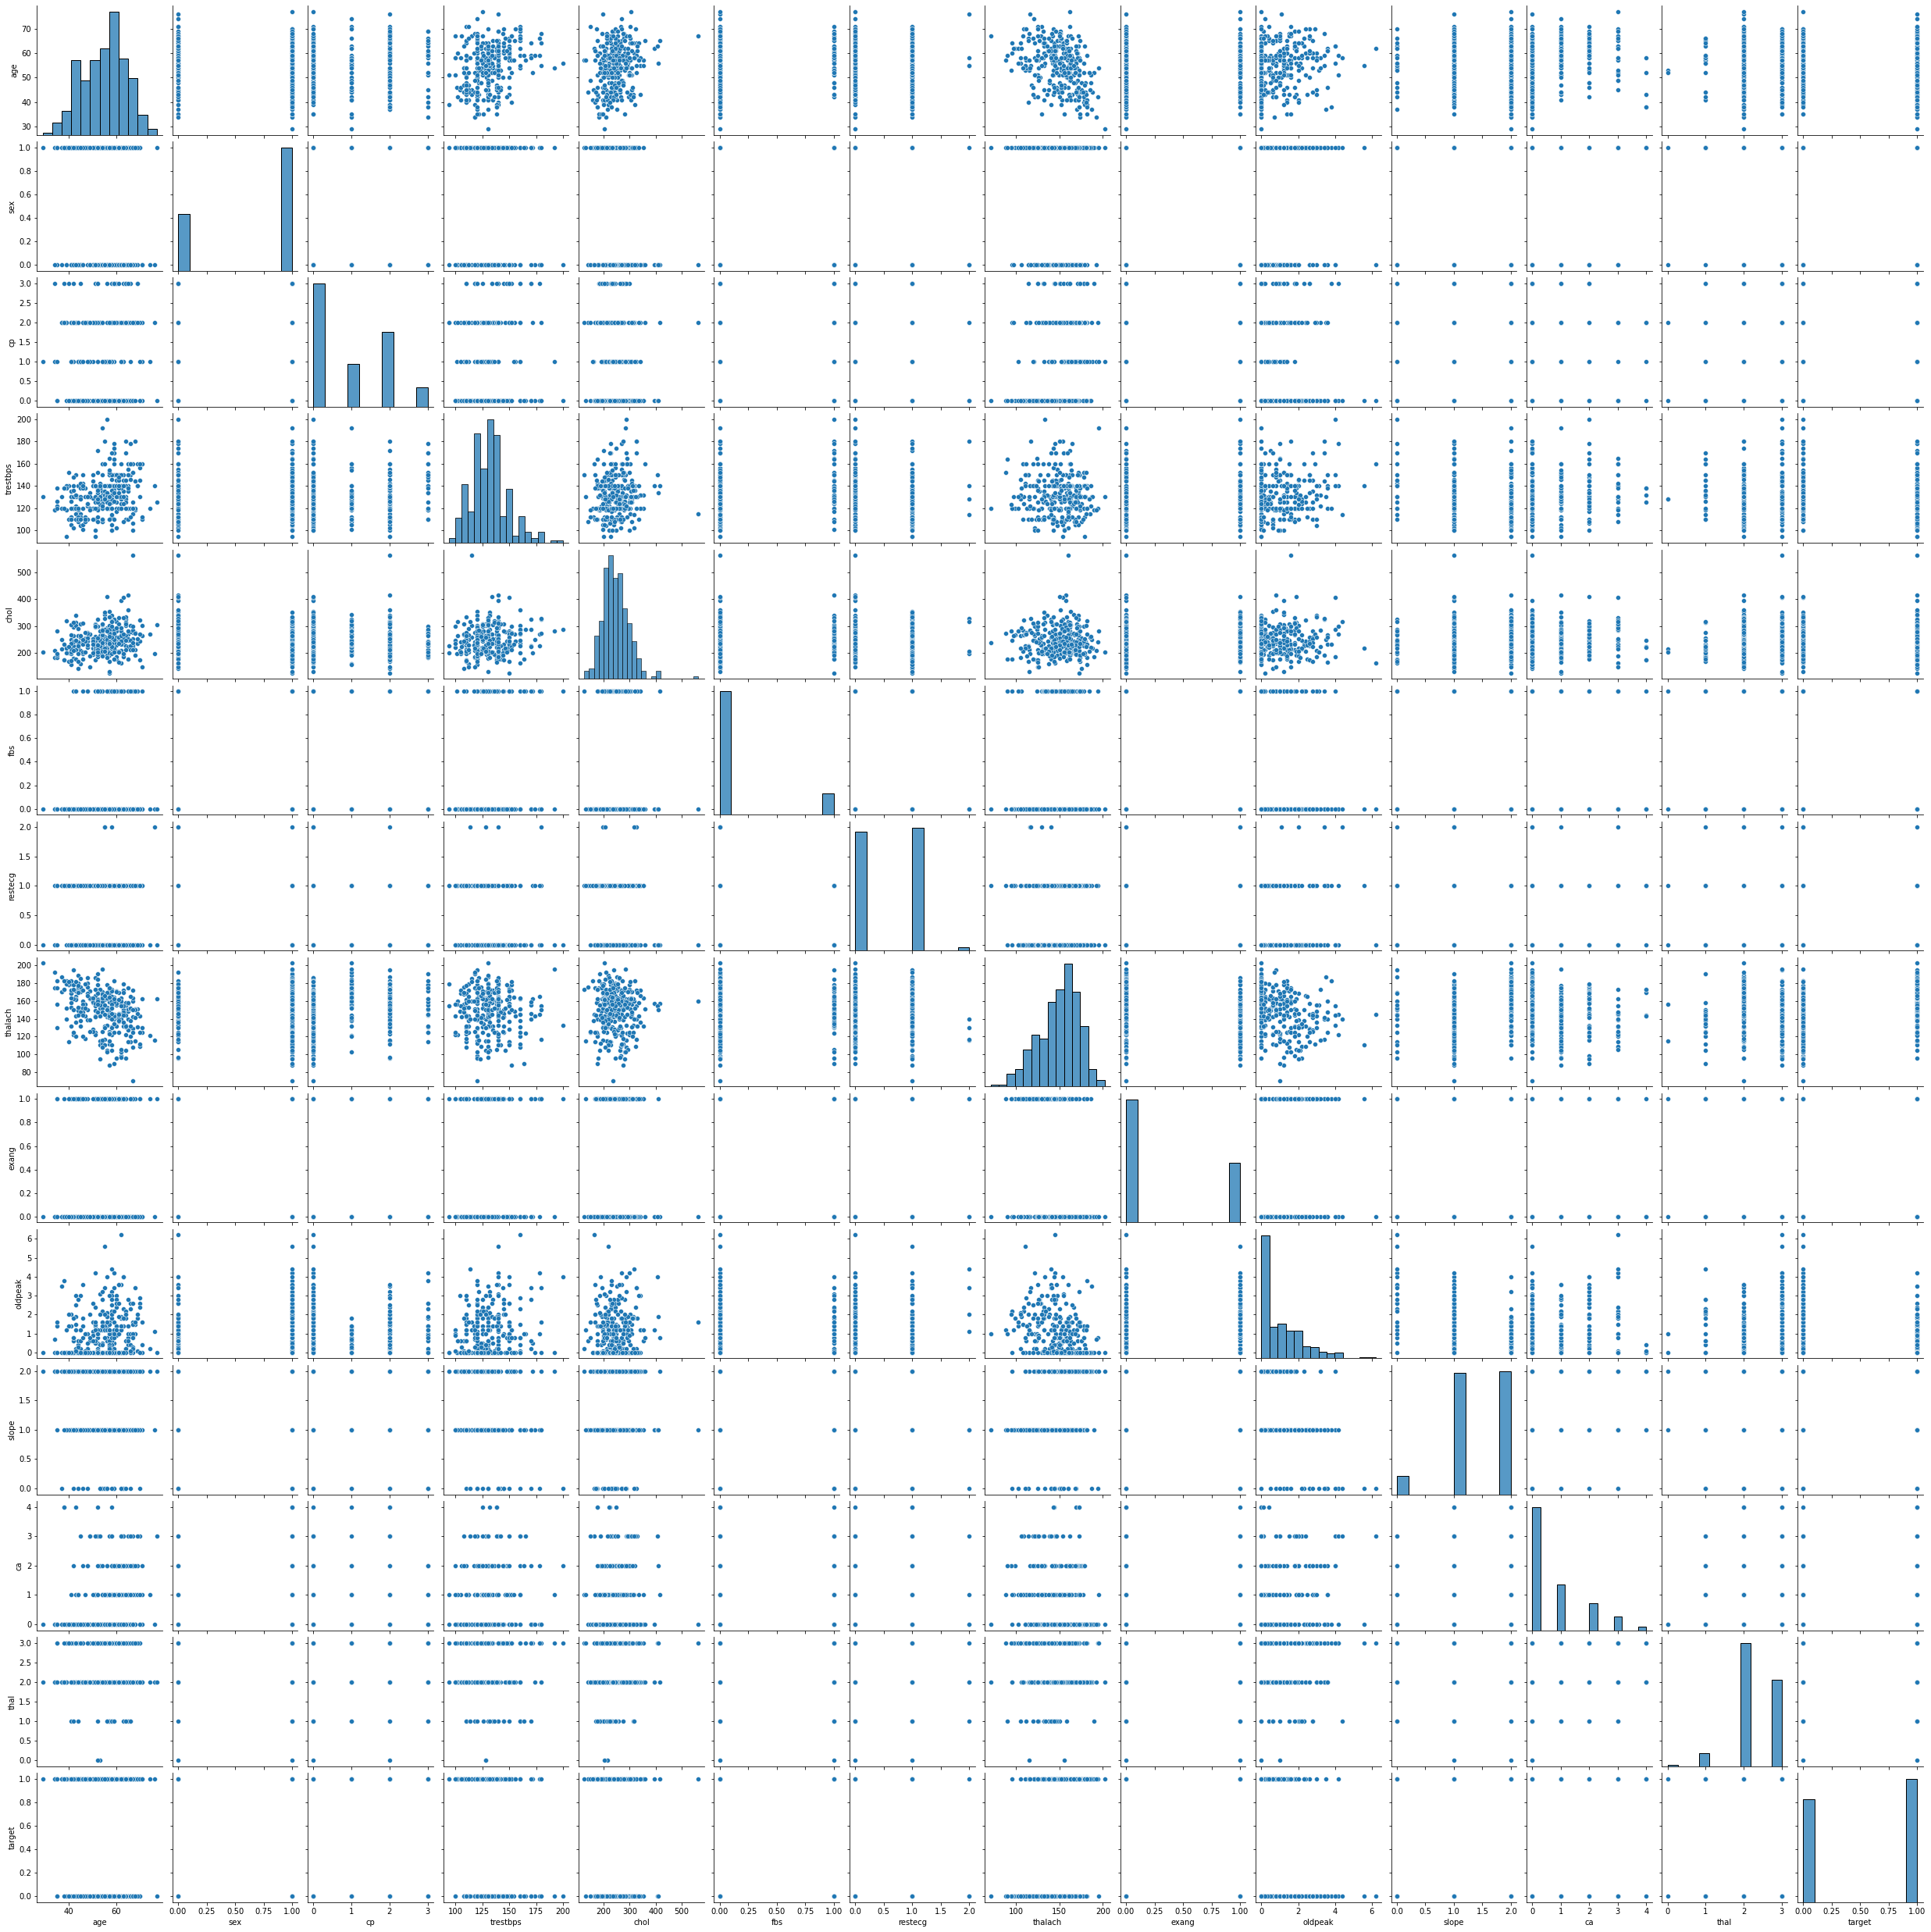

In [4]:
sns.pairplot(df)

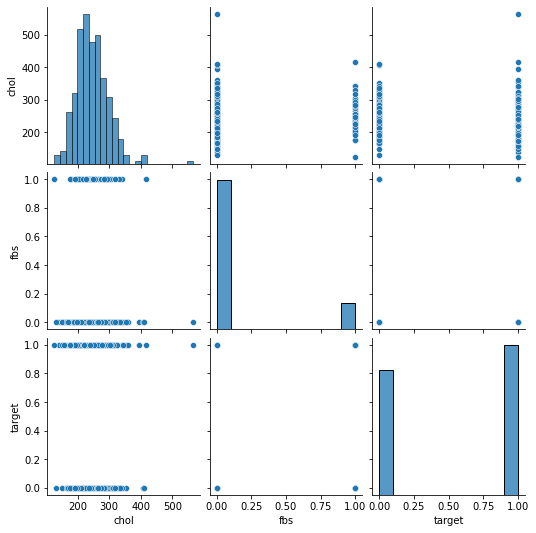

In [5]:
sns.pairplot(df[["chol","fbs","target"]])

In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [7]:
df_vis = df.copy()
df_vis['sex'] = df_vis['sex'].replace({0:'Female',1:'Male'})

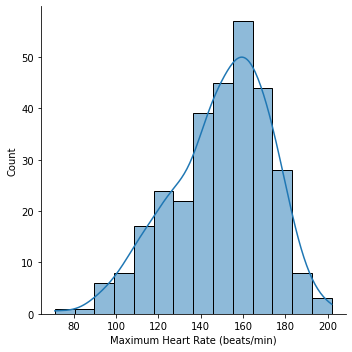

In [8]:
fig = sns.displot(data=df_vis,x ='thalach',kde=True)
fig.set_axis_labels('Maximum Heart Rate (beats/min)', 'Count')

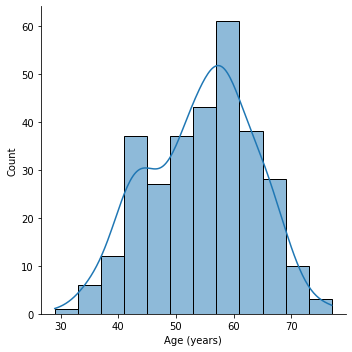

In [9]:
fig = sns.displot(data=df_vis,x ='age',kde=True)
fig.set_axis_labels('Age (years)', 'Count')

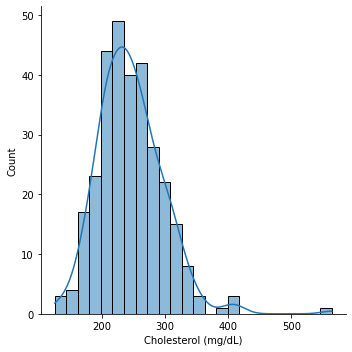

In [10]:
fig = sns.displot(data=df_vis,x ='chol',kde=True)
fig.set_axis_labels('Cholesterol (mg/dL)', 'Count')

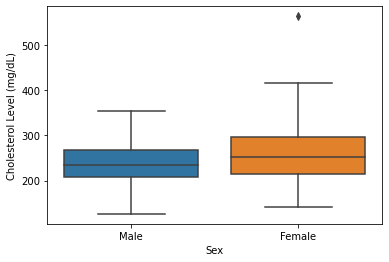

In [11]:
fig = sns.boxplot(y='chol',x='sex',data=df_vis).set(xlabel='Sex',ylabel='Cholesterol Level (mg/dL)')

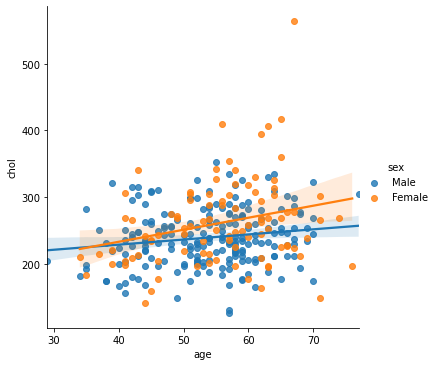

In [12]:
sns.lmplot(x="age", y="chol", hue = 'sex',data=df_vis)

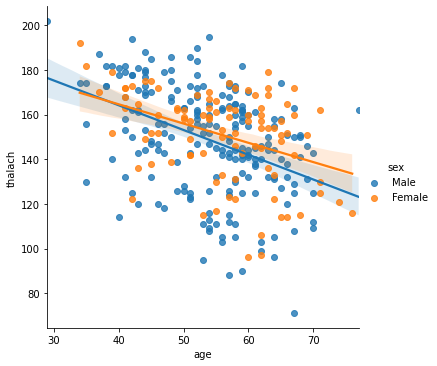

In [13]:
sns.lmplot(x="age", y="thalach", hue='sex',data=df_vis)

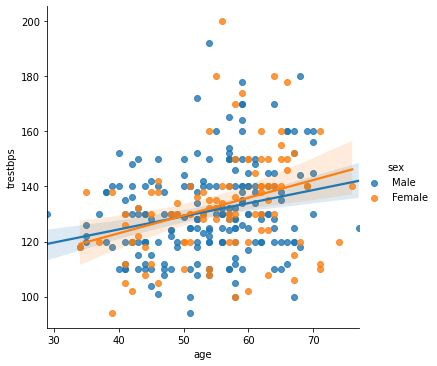

In [14]:
sns.lmplot(x="age", y="trestbps", hue='sex', data=df_vis)

# Data Preprocessing and Feature Engineering

In [15]:
X = df.drop(['target',"chol","fbs"],axis=1)
y = df['target']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
cat_var = ['sex','thal','exang']
cont_var = X.columns.difference(cat_var)

In [18]:
pipe_cat = Pipeline([('onehot',OneHotEncoder(handle_unknown = 'ignore',sparse=False)),
                     ('poly',PolynomialFeatures(degree = 2,interaction_only=True,include_bias=False))])
pipe_cont = Pipeline([('poly',PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)),
                     ('scaler',StandardScaler())])
cf = ColumnTransformer([('cat',pipe_cat,cat_var), 
                        ('cont',pipe_cont,cont_var)])

# Fitting Machine Learning Models

## _Logistic Regression_

In [19]:
main_pipe_logreg = Pipeline([('col_transformer',cf),
                      ('logreg',LogisticRegression(max_iter=1500,n_jobs=-1))])
params_logreg = {'logreg__C':[0.01,0.1,1,10],
                 "col_transformer__cont__poly__degree": [1,2,3]
                }
    
logreg_cv = GridSearchCV(main_pipe_logreg,params_logreg,cv=5, scoring="neg_brier_score")
logreg_cv.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False,
                                                                                                             interaction_only=True))]),
                                                                         ['sex',
                                                 

In [20]:
prediction_lr = logreg_cv.predict_proba(X_test)[:,1]
print('Classification Report :')
print(classification_report(y_test,(prediction_lr>0.5)*1))
print('Area Under ROC Curve :',roc_auc_score(y_test,(prediction_lr>0.5)*1))
print('------------------------------------------------------------')
print('Best Parameters :',logreg_cv.best_params_)
print('Brier Score on Test Set :',(-1)*logreg_cv.score(X_test, y_test))
print('Brier Score on Train Set :',(-1)*logreg_cv.score(X_train, y_train))

Classification Report :
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Area Under ROC Curve : 0.9014008620689655
------------------------------------------------------------
Best Parameters : {'col_transformer__cont__poly__degree': 2, 'logreg__C': 0.1}
Brier Score on Test Set : 0.09911424189918666
Brier Score on Train Set : 0.10121360619431832


## _Random Forest Classifier_

In [21]:
main_pipe_rf = Pipeline([('col_transformer',cf),
                      ('rf', RandomForestClassifier(n_jobs=-1))])

params_rf = {'rf__max_depth': [2,4,6,8,10], 
             'rf__min_samples_split': [2,4,6,8,10,12],
             'rf__min_samples_leaf': [5,10,15,20],
             'col_transformer__cont__poly__degree': [1,2,3]
            }

rf = GridSearchCV(main_pipe_rf, param_grid=params_rf, cv=5,scoring='neg_brier_score')
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False,
                                                                                                             interaction_only=True))]),
                                                                         ['sex',
                                                 

In [22]:
prediction_rf = rf.predict_proba(X_test)[:,1]
print('Classification Report :')
print(classification_report(y_test,(prediction_rf>0.5)*1))
print('Area under ROC Curve :',roc_auc_score(y_test,(prediction_rf>0.5)*1))
print('------------------------------------------------------------')
print('Best Parameters :',rf.best_params_)
print('Brier Score on Test Set :',(-1)*rf.score(X_test, y_test))
print('Brier Score on Train Set :',(-1)*rf.score(X_train, y_train))

Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

Area under ROC Curve : 0.8841594827586207
------------------------------------------------------------
Best Parameters : {'col_transformer__cont__poly__degree': 2, 'rf__max_depth': 6, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2}
Brier Score on Test Set : 0.10830606787870975
Brier Score on Train Set : 0.07595763997689005


## _Gradient Boosting Classifier_

In [23]:
params_gb = {'gb__learning_rate': [0.05,0.08,0.1,0.2],
                 'gb__n_estimators': [50,100,200],
                 'gb__min_samples_split': [4,6,8],
                 "col_transformer__cont__poly__degree": [1,2,3]
            }

main_pipe_gb = Pipeline([('col_transformer',cf),
                      ('gb', GradientBoostingClassifier(n_estimators=50))])


gb = GridSearchCV(main_pipe_gb, param_grid=params_gb, cv=5,scoring='neg_brier_score')
gb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('col_transformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False)),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False,
                                                                                                             interaction_only=True))]),
                                                                         ['sex',
                                                 

In [24]:
prediction_gb = gb.predict_proba(X_test)[:,1]
print('Classification Report :')
print(classification_report(y_test,(prediction_gb>0.5)*1))
print('Area under ROC Curve :',roc_auc_score(y_test,(prediction_gb>0.5)*1))
print('------------------------------------------------------------')
print('Best Parameters :',gb.best_params_)
print('Brier Score on Test Set :',(-1)*gb.score(X_test, y_test))
print('Brier Score on Train Set :',(-1)*gb.score(X_train, y_train))

Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Area under ROC Curve : 0.8372844827586207
------------------------------------------------------------
Best Parameters : {'col_transformer__cont__poly__degree': 1, 'gb__learning_rate': 0.05, 'gb__min_samples_split': 4, 'gb__n_estimators': 50}
Brier Score on Test Set : 0.13087992767501294
Brier Score on Train Set : 0.0694570784058968


# Visualizing Predictions

In [25]:
predict_df = X_test.copy()
predict_df['y'] = y_test
predict_df['lr'] = prediction_lr
predict_df['rf'] = prediction_rf
predict_df['gb'] = prediction_gb
predict_df["sex"].replace([0,1], ["female","male"], inplace=True)

value_cols = ['y', 'rf', 'gb', 'lr']

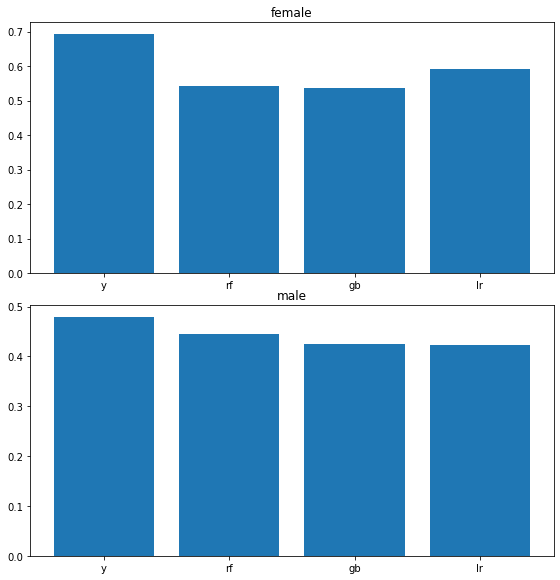

In [26]:
sex_df = predict_df.groupby("sex")
sex_df = sex_df[value_cols].mean()

n = len(sex_df)

fig, ax = plt.subplots(n,1,figsize=(8,8))
fig.tight_layout()
for i, ind in enumerate(sex_df.index):
    ax[i].bar(sex_df.columns, sex_df.loc[ind])
    ax[i].set_title(sex_df.index[i])

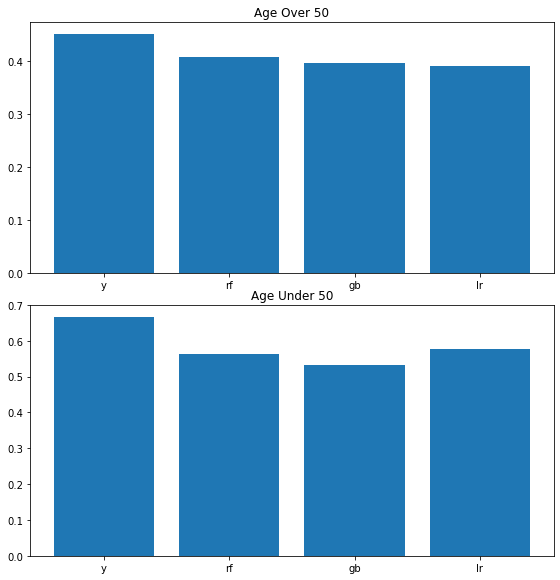

In [27]:
young_df = predict_df[predict_df["age"]<50]
young_df = young_df[value_cols].mean()

old_df = predict_df[predict_df["age"]>50]
old_df = old_df[value_cols].mean()

age_df = pd.DataFrame({'Age Over 50': old_df,'Age Under 50':young_df}).transpose()

n = len(age_df)

fig, ax = plt.subplots(n,1,figsize=(8,8))
fig.tight_layout()
for i, ind in enumerate(age_df.index):
    ax[i].bar(age_df.columns, age_df.loc[ind])
    ax[i].set_title(age_df.index[i])

           y        rf        gb        lr
cp                                        
0   0.212121  0.234134  0.245848  0.184990
1   1.000000  0.847068  0.829760  0.862404
2   0.923077  0.716878  0.651504  0.780723
3   0.666667  0.630597  0.543433  0.659709


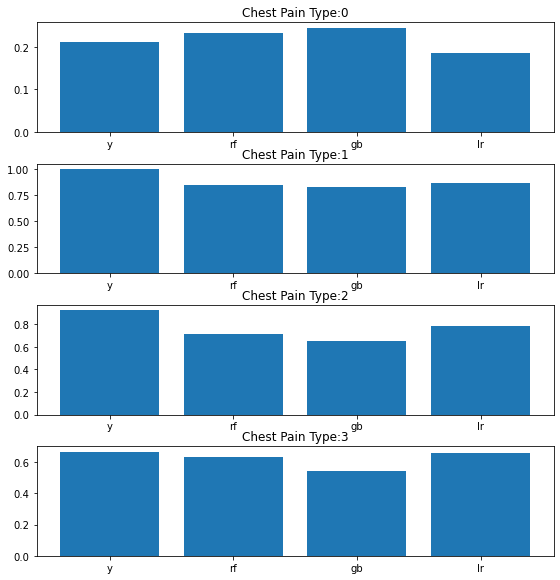

In [28]:
cp_df = predict_df.groupby("cp")
cp_df = cp_df[value_cols].mean()
print(cp_df)
n = len(cp_df)

fig, ax = plt.subplots(n,1,figsize=(8,8))
fig.tight_layout()
for i, ind in enumerate(cp_df.index):
    ax[i].bar(cp_df.columns, cp_df.loc[ind])
    ax[i].set_title("Chest Pain Type:"+str(cp_df.index[i]))

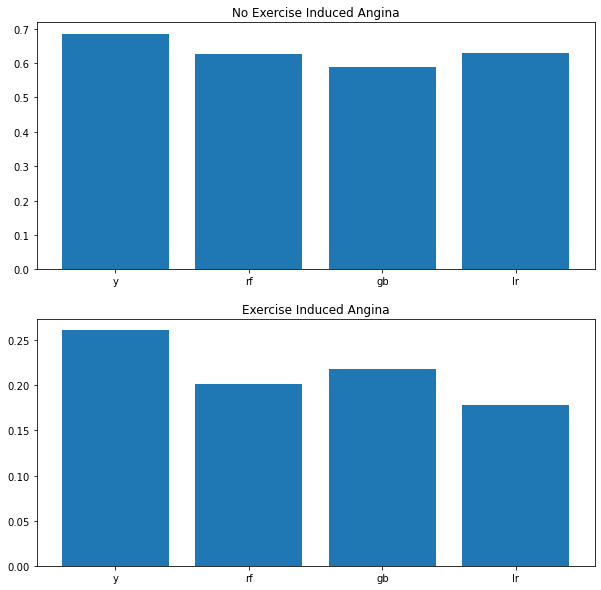

In [29]:
exang_df = predict_df.groupby("exang")
exang_df = exang_df[value_cols].mean()

n = len(exang_df)

fig, ax = plt.subplots(n,1,figsize=(10,10))
for i, ind in enumerate(exang_df.index):
    ax[i].bar(exang_df.columns, exang_df.loc[ind])
    if exang_df.index[i]==1:
        ax[i].set_title("Exercise Induced Angina")
    else:
        ax[i].set_title("No Exercise Induced Angina")

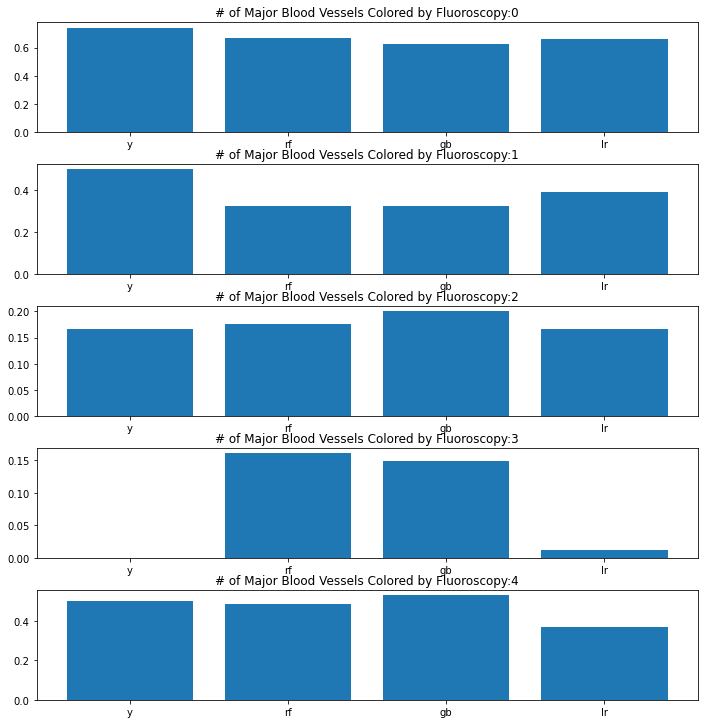

In [30]:
ca_df = predict_df.groupby("ca")
ca_df = ca_df[value_cols].mean()

n = len(ca_df)

fig, ax = plt.subplots(n,1,figsize=(10,10))
fig.tight_layout()
for i, ind in enumerate(ca_df.index):
    ax[i].bar(ca_df.columns, ca_df.loc[ind])
    ax[i].set_title("# of Major Blood Vessels Colored by Fluoroscopy:"+str(ca_df.index[i]))

                y        rf        gb        lr
restecg                                        
0        0.371429  0.351223  0.352221  0.322713
1        0.730769  0.621548  0.576277  0.641501


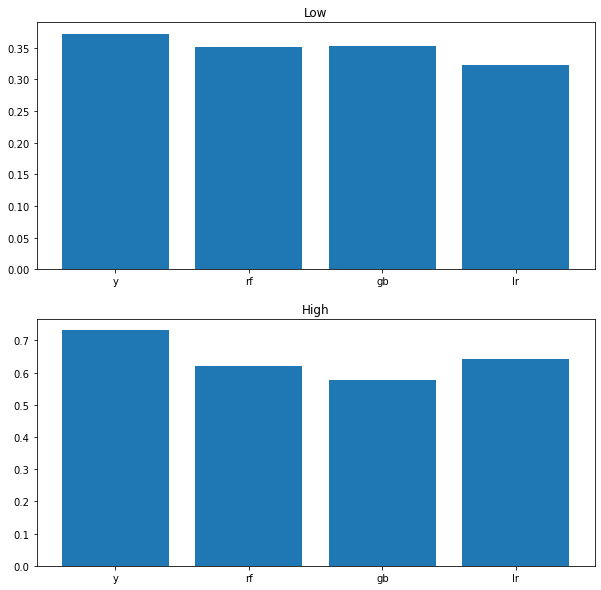

In [31]:
restecg_df = predict_df.groupby("restecg")
restecg_df = restecg_df[value_cols].mean()
print(restecg_df)
n = len(restecg_df)
fig, ax = plt.subplots(n,1,figsize = (10,10))
for i, ind in enumerate(restecg_df.index):
    ax[i].bar(restecg_df.columns, restecg_df.loc[ind])
    if restecg_df.index[i]==1:
        ax[i].set_title("High")
    else:
        ax[i].set_title("Low")

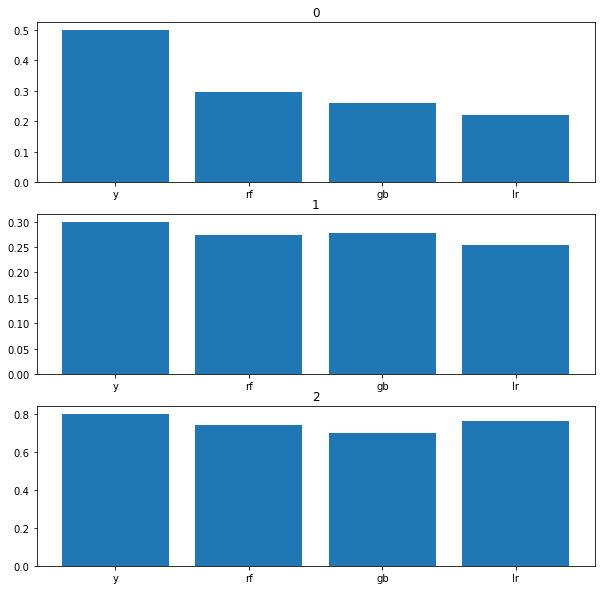

In [32]:
slope_df = predict_df.groupby("slope")
slope_df = slope_df[value_cols].mean()
n = len(slope_df)
fig, ax = plt.subplots(n,1,figsize = (10,10))
for i, ind in enumerate(slope_df.index):
    ax[i].bar(slope_df.columns, slope_df.loc[ind])
    ax[i].set_title(slope_df.index[i])

In [34]:
# fbs_df = predict_df.groupby("fbs")
# fbs_df = fbs_df[value_cols].mean()
# print(fbs_df)
# n = len(fbs_df)
# fig, ax = plt.subplots(n,1,figsize = (10,10))
# for i, ind in enumerate(fbs_df.index):
#     ax[i].bar(fbs_df.columns, fbs_df.loc[ind])
#     if fbs_df.index[i]==1:
#         ax[i].set_title("High")
#     else:
#         ax[i].set_title("Low")